In [1]:
!nvidia-smi

Fri Mar  1 23:14:28 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
| 36%   43C    P8     1W /  38W |    327MiB /  2048MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:05:00.0 Off |                  N/A |
|  0%   

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from keras import layers, losses
from keras.datasets import mnist
from keras.models import Model


In [3]:
# Loading the MNIST dataset and extracting training and testing data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizing pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Displaying the shapes of the training and testing datasets
print("Shape of the training data:", x_train.shape)
print("Shape of the testing data:", x_test.shape)


Shape of the training data: (60000, 28, 28)
Shape of the testing data: (10000, 28, 28)


In [4]:
# Definition of the Autoencoder model as a subclass of the TensorFlow Model class

class SimpleAutoencoder(Model):
	def __init__(self,latent_dimensions , data_shape):
		super(SimpleAutoencoder, self).__init__()
		self.latent_dimensions = latent_dimensions
		self.data_shape = data_shape

		# Encoder architecture using a Sequential model
		self.encoder = tf.keras.Sequential([
			layers.Flatten(),
			layers.Dense(latent_dimensions, activation='relu'),
		])

		# Decoder architecture using another Sequential model
		self.decoder = tf.keras.Sequential([
			layers.Dense(tf.math.reduce_prod(data_shape), activation='sigmoid'),
			layers.Reshape(data_shape)
		])

	# Forward pass method defining the encoding and decoding steps
	def call(self, input_data):
		encoded_data = self.encoder(input_data)
		decoded_data = self.decoder(encoded_data)
		return decoded_data

# Extracting shape information from the testing dataset
input_data_shape = x_test.shape[1:]

# Specifying the dimensionality of the latent space
latent_dimensions = 64

# Creating an instance of the SimpleAutoencoder model
simple_autoencoder = SimpleAutoencoder(latent_dimensions, input_data_shape)


2024-03-01 23:15:59.706361: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-01 23:15:59.706527: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-01 23:15:59.750446: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-01 23:15:59.750634: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-01 23:15:59.750762: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

In [5]:
simple_autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

simple_autoencoder.fit(x_train, x_train,
				epochs=1,
				shuffle=True,
				validation_data=(x_test, x_test))


 239/1875 [==>...........................] - ETA: 1s - loss: 0.0641 

2024-03-01 23:16:11.910721: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1875/1875 [==============================] - 3s 1ms/step - loss: 0.0237 - val_loss: 0.0091


In [6]:
simple_autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

simple_autoencoder.fit(x_train, x_train,
				epochs=1,
				shuffle=True,
				validation_data=(x_test, x_test))


1875/1875 [==============================] - 2s 796us/step - loss: 0.0068 - val_loss: 0.0052


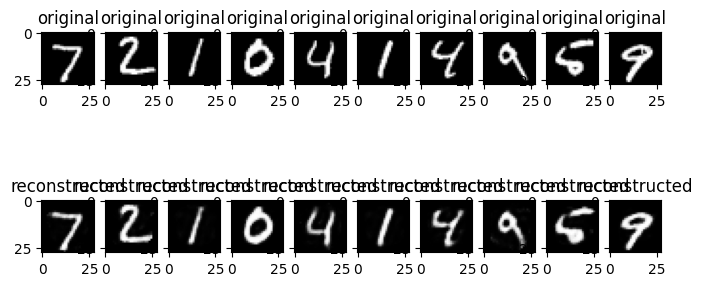

In [9]:
encoded_imgs = simple_autoencoder.encoder(x_test).numpy()
decoded_imgs = simple_autoencoder.decoder(encoded_imgs).numpy()

n = 10
plt.figure(figsize=(8, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()

plt.show()
